# VHS XMM / HSC WIDE W02 run

In this directory we are performing a VHS Ks selected processing of VHS J,Ks and HSC G,R,I,Z,Y PDR2 WIDE data.


In this notebook we plot the VHS tiles, over the tracts to patches to check coverages and then create the slurm jobs required to send the jobs to IRIS as arrays. We will also calculate times based on benchmarking on the SXDS field.

In [27]:
from astropy.table import Table,Column
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json

#We are using a rings skymap
from lsst.geom import SpherePoint 
from lsst.geom import degrees
from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig

config = RingsSkyMapConfig()
#These config options are chose to be the same as HSC:
#https://github.com/lsst/obs_subaru/blob/master/config/hsc/makeSkyMap.py
config.numRings = 120
config.projection = "TAN"
config.tractOverlap = 1.0/60 
config.pixelScale = 0.168
sm = RingsSkyMap(config)

## 1. Plot the regions and compute tile/patch numbers

In [2]:
vhs_ims = Table.read('../../dmu1/data/vhs_images_overview_20201102.csv')
hsc_ims = Table.read('../../dmu1/data/hsc_images_overview.csv')

In [28]:
vhs_ims.add_column(Column(
    data= [t.split('/')[-2] for t in vhs_ims['file']],
    name='date'))

In [29]:
def fileToNumObs(filename):
    "Parse the file name to an obsNum"
    numObs = filename.split('_')[1].strip('_st_tl_conf.fit')
    return numObs
vhs_ims['numObs'] = [fileToNumObs(f) for f in vhs_ims['file']]

In [3]:
hsc_ims['tract'] = [f.split('/')[14] for f in hsc_ims['file']]
hsc_ims['patch'] = [f.split('/')[15] for f in hsc_ims['file']]
hsc_ims['depth'] = [f.split('/')[11] for f in hsc_ims['file']]
hsc_ims['band'] = [f.split('-')[-3] for f in hsc_ims['file']]

In [4]:
def fileToType(filename):
    filetype = ''
    types = {
        'tile':'_tl.fit',
        'stack':'_st.fit',
    }
    for k,v in types.items():
        #print(k,v)
        if filename.endswith(v):
            filetype = k
  
    return filetype
vhs_ims['type'] = [fileToType(f) for f in vhs_ims['file']]

In [5]:
"Out of {} files in VHS there are {} stack images".format(len(vhs_ims),np.sum(vhs_ims['type']=='stack'))

'Out of 887732 files in VHS there are 204996 stack images'

In [6]:
vhs_near_xmm = vhs_ims['ra'] > 27
vhs_near_xmm &= vhs_ims['ra'] < 41.
vhs_near_xmm &= vhs_ims['dec'] > -9
vhs_near_xmm &= vhs_ims['dec'] < 6

vhs_ims = vhs_ims[vhs_near_xmm]
"Out of {} VHS files near the XMM field there are {} stack images in the ra dec limits.".format(len(vhs_ims), np.sum(vhs_ims['type']=='stack'))

/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


'Out of 9364 VHS files near the XMM field there are 2226 stack images in the ra dec limits.'

In [7]:
vhs_ims[:5]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,visit,exptime,hash,type
str96,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,int64,int64,str32,str5
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00202_st_conf.fit,34.896612,-5.01792,35.404526600063434,35.40619098169643,35.20638916978692,35.20753164503533,-4.373059929199487,-4.570010922703603,-4.371999130856049,-4.569278364440275,J,31112640,29459,15,4e97ece6a576c05bd33aa2abb2505f8e,
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00212.fit,34.896654,-5.2011,35.404850133003386,35.40625921809459,35.21224126097092,35.213152910179076,-4.556935165961786,-4.748405459552376,-4.555913318726361,-4.747695844578298,H,101782080,29469,30,4c8674cd693fecd9255a2ca1f232a8b0,
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00224.fit,34.896654,-5.2011,35.404850133003386,35.40625921809459,35.21224126097092,35.213152910179076,-4.556935165961786,-4.748405459552376,-4.555913318726361,-4.747695844578298,Ks,101113920,29481,30,d1270cc9d0e5aff833bce78850db8eff,
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00214.fit,34.896612,-5.01792,35.40468126838198,35.406084523905896,35.21212049617886,35.21302851020096,-4.373762369626489,-4.565232703141791,-4.372736096721482,-4.564518638616275,H,102124800,29471,30,cf2ea127f79289cc10b599252d1465ad,
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00213.fit,34.891087,-5.20664,35.399287554721695,35.40069681656664,35.20667719582002,35.20758895525299,-4.562479114129507,-4.753949406508984,-4.561457400877086,-4.7532399262424025,H,101914560,29470,30,f62e5d26bfd3de4e9a950ad6b60c5249,


In [8]:
"There are {} stack files near XMM".format(np.sum(vhs_ims['type']=='stack'))

'There are 2226 stack files near XMM'

In [9]:
hsc_bands = ['G', 'R', 'I', 'Z', 'Y']
vista_bands = ['Y', 'J', 'H', 'Ks']

In [10]:
#https://hsc-release.mtk.nao.ac.jp/rsrc/pdr2/koike/survey-area/info/tracts_patches_W-w02.txt
patches_file = '../../dmu0/dmu0_HSC/tracts_patches/tracts_patches_W-w02.txt'

In [11]:
f = open(patches_file, 'r')
tracts = set()

for x in f:
    #print(x)
    
    
    if x.startswith('Tract'):
        #print(int(x.split(' ')[1]))
        tracts.add(int(x.split(' ')[1])) 
        #print('ewrter' , patches, int(x.split(' ')[1]))
    #n+=1
    #if n == 100:
       # break
    

In [12]:

for x in tracts:
    print(x, end=',')

9731,9732,9733,9734,9735,9736,9737,9738,9739,9245,9246,9247,9248,9249,9250,9251,9252,9253,8761,8762,8763,8764,8765,8766,8767,8768,8769,8278,8279,8280,8281,8282,8283,8284,8285,8286,9973,9974,9975,9976,9977,9978,9979,9980,9981,9488,9489,9490,9491,9492,9493,9494,9495,9496,9003,9004,9005,9006,9007,9008,9009,9010,9011,8519,8520,8521,8522,8523,8524,8525,8526,8527,10215,10216,10217,10218,10219,10220,10221,10222,10223,

In [13]:
full_patch_dict = {}
band_dict = { hsc_bands[i]: {} for i in range(len(hsc_bands))}
for tract in tracts:
    full_patch_dict[tract] = [
        s for s in np.unique(np.array(hsc_ims[ (hsc_ims['tract'] == str(tract))]['patch']))
    ]
    for band in hsc_bands:
        band_dict[band][tract] = [
            s for s in np.unique(np.array(hsc_ims[
                (hsc_ims['tract'] == str(tract))
                & (hsc_ims['band'] == band)
            ]['patch']))
        ]

In [14]:
full_patch_dict

{9731: [],
 9732: [],
 9733: [],
 9734: [],
 9735: [],
 9736: [],
 9737: [],
 9738: [],
 9739: [],
 9245: [],
 9246: [],
 9247: [],
 9248: [],
 9249: [],
 9250: [],
 9251: [],
 9252: [],
 9253: [],
 8761: ['0,0',
  '0,1',
  '0,2',
  '0,3',
  '0,4',
  '0,5',
  '0,6',
  '0,7',
  '0,8',
  '1,0',
  '1,1',
  '1,2',
  '1,3',
  '1,4',
  '1,5',
  '1,6',
  '1,7',
  '1,8',
  '2,0',
  '2,1',
  '2,2',
  '2,3',
  '2,4',
  '2,5',
  '2,6',
  '2,7',
  '2,8',
  '3,0',
  '3,1',
  '3,2',
  '3,3',
  '3,4',
  '3,5',
  '3,6',
  '3,7',
  '3,8',
  '4,0',
  '4,1',
  '4,2',
  '4,5',
  '4,6',
  '4,7',
  '4,8',
  '5,0',
  '5,1',
  '5,7',
  '5,8',
  '6,0',
  '6,8'],
 8762: ['0,0',
  '0,1',
  '0,2',
  '0,3',
  '0,4',
  '0,5',
  '0,6',
  '0,7',
  '0,8',
  '1,0',
  '1,1',
  '1,2',
  '1,3',
  '1,4',
  '1,5',
  '1,6',
  '1,7',
  '1,8',
  '2,0',
  '2,1',
  '2,2',
  '2,3',
  '2,4',
  '2,5',
  '2,6',
  '2,7',
  '2,8',
  '3,0',
  '3,1',
  '3,2',
  '3,3',
  '3,4',
  '3,5',
  '3,6',
  '3,7',
  '3,8',
  '4,0',
  '4,1',
  '4,2

mkdir: figs: File exists


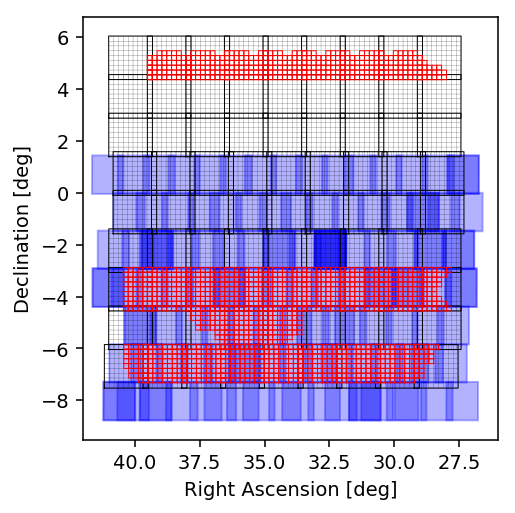

In [15]:
!mkdir figs
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
for tract in tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k', linewidth=0.5)
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.1)

#Plot patches on a band
band = 'all'
if band != 'all':
    d = band_dict[band]
else:
    d = full_patch_dict
for tract in d:
    for patch in d[tract]:
        #print(p[0], p[1])
        p = [int(i) for i in patch.split(',')]
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'r', alpha=1.0, linewidth=0.5)
        

v_band ='Ks'
for t in vhs_ims[(vhs_ims['type'] == 'tile') & (vhs_ims['filter'] == v_band) ]:

    ra = [t['ra_0_0'], t['ra_x_0'] , t['ra_x_y'] , t['ra_0_y'] , t['ra_0_0'] ]
    dec = [t['dec_0_0'], t['dec_x_0'] , t['dec_x_y'] , t['dec_0_y'] , t['dec_0_0'] ]
    
    ax.fill(ra,dec, c = 'b', alpha=0.3)
        
        
        

ax.axis('scaled')
ax.set_xlim([42, 26])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]')
fig.savefig('./figs/xmm_HSC-{}_tracts.pdf'.format(band), overwrite=True)
fig.savefig('./figs/xmm_HSC-{}_tracts.png'.format(band), overwrite=True)

In [16]:
#How many diferent exposure times for stacks are there
np.unique(vhs_ims[(vhs_ims['type'] == 'stack') & (vhs_ims['filter'] == v_band) ]['exptime'])

7
10


In [17]:
6*9*81

4374

## 1. Make the ProcessCcd array job

We will now create a dictionary mapping integer 0 indexed job ids to job options to reduce the number of slurm files required. This dictionary can then be saved as a json file and passed to the bash script which runs the process. We may wish to move to pure Python but I'm not sure about how parrellelisaion works. 

In [30]:
vhs_stacks = vhs_ims[(vhs_ims['type'] == 'stack')]

In [31]:
vhs_stacks[:5]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,visit,exptime,hash,type,date,numObs
str96,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,int64,int64,str32,str5,str8,str5
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00222_st.fit,34.804687,-5.01793,35.312707019916964,35.314407350222794,35.11450250774012,35.115681029574056,-4.373195391068977,-4.57017983835073,-4.3721493421917,-4.569462302277308,Ks,83237760,29479,10,6334fa8e2fa052ae3bb4212bf029f0e3,stack,20091205,00222
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00202_st.fit,34.896612,-5.01792,35.40453157945198,35.40620669308607,35.206385554369206,35.20753879330131,-4.373055490495513,-4.569988064522196,-4.372025336570983,-4.569286329153446,J,71951040,29459,15,44f5f4c580a063b818365189db3c3400,stack,20091205,00202
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00224_st.fit,34.896654,-5.2011,35.40472352530455,35.40647919755801,35.206578748488184,35.207810828827974,-4.556232225088364,-4.753152536874261,-4.555240501363468,-4.752489328046947,Ks,82990080,29481,10,94a3247fb408b871205cbaf69472a989,stack,20091205,00224
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00214_st.fit,34.896612,-5.01792,35.40456952659107,35.40626578943614,35.20636758494594,35.207541906883804,-4.37304111795857,-4.5699974075054595,-4.371999803655622,-4.569284527113134,H,83203200,29471,10,bc4ca27caec3e753d7ca61db6be1759f,stack,20091205,00214
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20091205/v20091205_00206_st.fit,34.712762,-5.01792,35.22108764513667,35.22271769105083,35.02298812890713,35.02409666753289,-4.373826529728623,-4.5708401048502125,-4.372832883321965,-4.5701758150126555,H,82923840,29463,10,b190c55c6f797cb917f51b7afbd02d31,stack,20091205,00206


In [59]:
def raDecToTractSafe(ra,dec):
    """Return all the tracts within 2 degrees of a ra dec to get every tract covering a tile"""
    size = 3 #degrees safely outside tile from centre
    patches= sm.findTractPatchList([
        SpherePoint((ra+size)*degrees,(dec+size)*degrees),
        SpherePoint((ra+size)*degrees,(dec-size)*degrees),
        SpherePoint((ra-size)*degrees,(dec+size)*degrees),
        SpherePoint((ra-size)*degrees,(dec-size)*degrees)
    ])
    tracts = set([p[0].getId() for p in patches])
    t =''
    for n in tracts:
        t += '^{}'.format(n)
    return t[1:]
    
print(vhs_stacks[0]['ra'], vhs_stacks[0]['dec'],raDecToTractSafe(vhs_stacks[0]['ra'],vhs_stacks[0]['dec']))

34.804687 -5.01793 8040^9009^8044^9005


In [60]:
processCcd_job_dict = {}

for i in np.arange(len(vhs_stacks)):
    date=vhs_stacks[i]['date']
    processCcd_job_dict[str(i)] = [
        '{}-{}-{}'.format(date[0:4],date[4:6],date[6:9]),
        vhs_stacks[i]['numObs'],
        'VISTA-{}'.format(vhs_stacks[i]['filter']),
        raDecToTractSafe(vhs_stacks[i]['ra'],vhs_stacks[i]['dec'])
        
    ]
    

In [70]:
processCcd_job_dict['0']

['2009-12-05', '00222', 'VISTA-Ks', '8040^9009^8044^9005']

In [76]:
with open('./slurm/processCcd_job_dict.json', 'w') as outfile:
    json.dump(processCcd_job_dict, outfile, separators=(',', ':'))

# 2. Make the coadd array job

The skymap must be made before this stage

# 3. Make the photometric pipeline array job

HSC files must be copied into place before this stage